In [1]:
import sys

sys.path.append("../bright_objects_masks")
import radius_study
import call_dc2
import warnings

warnings.filterwarnings("ignore")

In this notebook, we show how to compute the density ratio as a function of radius around stars.  
As a reminder, we have density_ratio(r) = density(r)/mean_catalog_density. 

Basic way to compute density_ratio(r).

In [2]:
critical_radius = radius_study.Critical_radius(tract_list=[3830, 4236])

There are several configuration parameters which allows one to do the calculation without having to open the catalog by hand. As there are a large amount of parametters, they are stored in config.yaml in the folder named "config". You can either modify this file or provide your own one but then you'll need to specify it when you'll try to do the masks.

In [ ]:
critical_radius = radius_study.Critical_radius(
    name="dc2_object_run2.2i_dr6_v2_with_addons_v2",
    theta_bins=np.logspace(np.log10(0.5), np.log10(50), 50),
    tract_list=None,
    quantities=["ra", "dec", "mag_i_cModel"],
    conditions=None,
    conditions_galaxies=["extendedness==1", "mag_i_cModel>17", "mag_i_cModel<25.3"],
    conditions_stars=["extendedness==0"],
    binned_quantity="mag_i_cModel",
    bins=[0, 17, 18, 20, 22, 24],
)

First, we read objects catalogs and apply selected cuts. This method returns galaxies, neighbouring tracts galaxies, stars.

In [3]:
density_glob = critical_radius.get_density_ratio()

In [ ]:
print(density_glob)

We define again theta_bins for later plots.

In [5]:
import numpy as np

theta_bins = np.logspace(np.log10(0.5), np.log10(50), 50)

If density_ratio is calculated, it can directly be given to get_critical_radius. Otherwize the method will do the calculation by itself.

"get_critical_radius" calculates the radius of the circle within the cut will be performed depending on the brigthness of the star.

In [6]:
critical_radius_value = critical_radius.get_critical_radius(
    density_ratio=density_glob, critical_density=0.9
)

In [ ]:
print(critical_radius_value)

What does it look like (red vertical line is the cut radius).

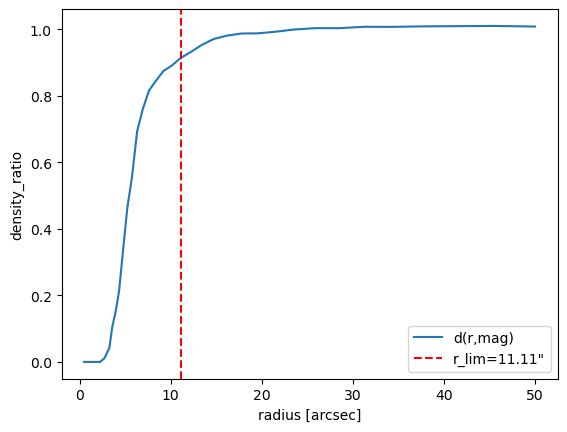

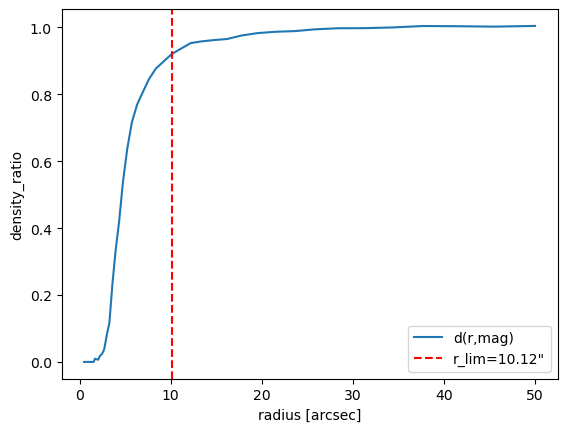

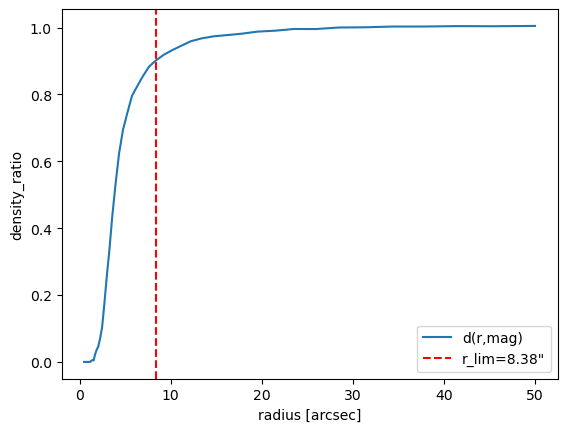

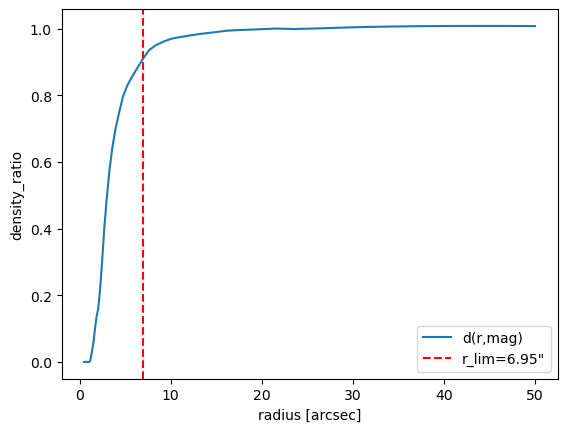

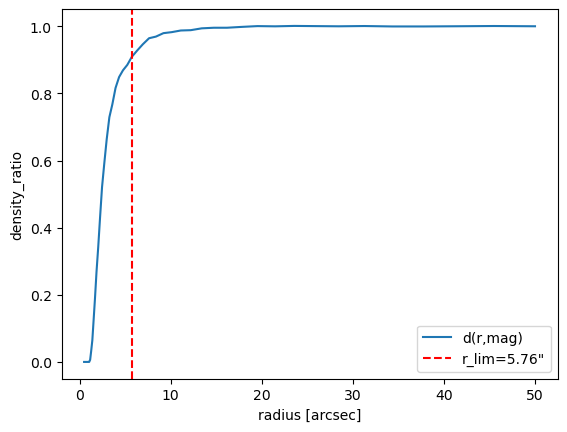

In [10]:
import matplotlib.pyplot as plt

for i in range(len(density_glob)):
    plt.close()
    plt.plot(theta_bins, density_glob[i], label="d(r,mag)")
    plt.axvline(
        critical_radius_value[i],
        color="red",
        linestyle="--",
        label=f'r_lim={critical_radius_value[i]}"',
    )
    plt.xlabel("radius [arcsec]")
    plt.ylabel("density_ratio")
    plt.legend()
    plt.show()